# Project Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\Oscar Jacob\\Documents\\avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Some relevant columns in the dataset:


•	Date - The date of the observation

•	AveragePrice - the average price of a single avocado

•	type - conventional or organic

•	year - the year

•	Region - the city or region of the observation

•	Total Volume - Total number of avocados sold

•	4046 - Total number of avocados with PLU 4046 sold

•	4225 - Total number of avocados with PLU 4225 sold

•	4770 - Total number of avocados with PLU 4770 sold


# Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .


Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


In [3]:
#Checking the shape of dataframe
df.shape

(18249, 14)

18249 rows and 14 columns

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [6]:
df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
#Checking to see if there are any unique values present in the column xlarge bags
df['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

# Dropping less important columns

1. Unnamed column as it is showing only index positions and not anything necessary that will help us in data analysis

2. Total Bags column is caluclated by the summing up data from small bags,large bags and extra large bags column.

In [8]:
df.drop(columns = ['Unnamed: 0','Total Bags'],inplace = True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Checking for missing values

In [9]:
sns.set_style('darkgrid')
plt.rcParams['font.size']= 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [10]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

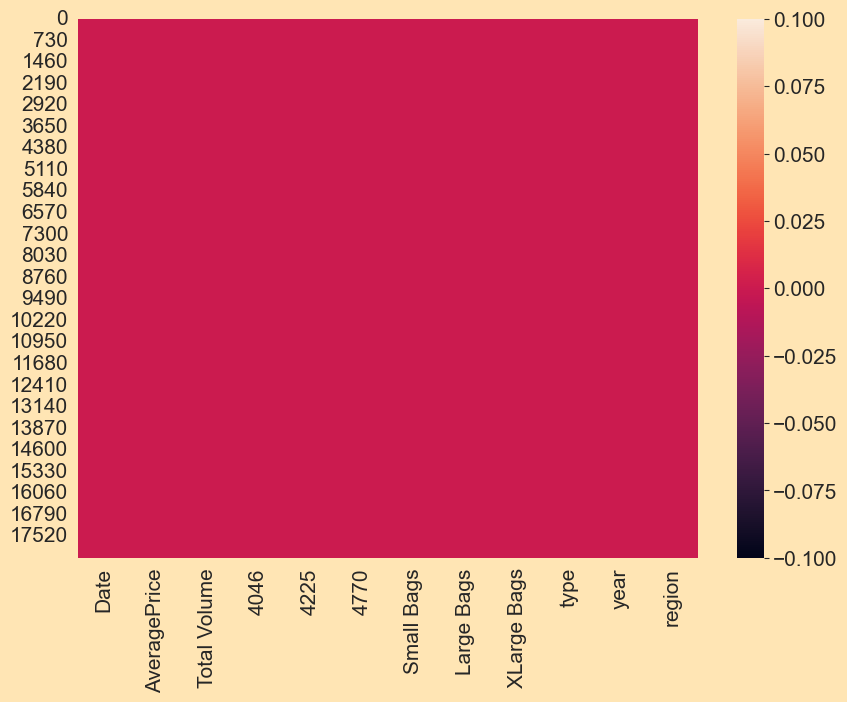

In [11]:
#Visualizing using Heatmap
sns.heatmap(df.isnull())

# Checking for Duplicated Values

In [12]:
df.duplicated().sum()

0

 No missing and duplicated data in our dataset.

# Datatypes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(8), int64(1), object(3)
memory usage: 1.7+ MB


In [14]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

1. There are 3 different datatypes present in this dataset float64 (8 columns), int 64(1 column) and object(3 columns)

2. Target variable Average  Price is of datatype float64 and numerical and Region is object datatype and categorical in nature


In [15]:
#checking number of unique values present in each column

df.nunique().to_frame("No. of unique values")

,No. of unique values
Date,169
AveragePrice,259
Total Volume,18237
4046,17702
4225,18103
4770,12071
Small Bags,17321
Large Bags,15082
XLarge Bags,5588
type,2


In [16]:
#checking value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
37815

1. Date  column is of datatype object, will need to convert it later to datetime and it has 169 unique values


2. Average Price,Total Volume,4046,4225,4770,Small Bags,Large Bags, XLarge Bags contains continous and numerical data and 259,18237,17702,18103,12071,17321,15082 and 5588 unique values respectively.



3. Year Type  and Region columns are categorical in nature with 4,2 and 54 unique values respectively.



# Descriptive Statistics

In [17]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.338459e+07,5.719097e+06,551693.650000,2018.000000


# Observations:
    
1. The average price of avocados ranged from 0.44 to 3.25 US dollars, with a mean of 1.41 and a standard deviation of 0.40. This means that there was some variation in the price of avocados across different regions and years.


2. The total volume of avocados sold in the US ranged from 84.56 to 62,505,650 units, with a mean of 850,644 and a standard deviation of 3,453,545. This means that there was a huge difference in the sales of avocados across different regions and years. Some regions and years had very high sales, while others had very low sales.


3. The distribution of the PLU codes (4046, 4225, and 4770) was similar to the total volume, with a large range, mean, and standard deviation. This means that the sales of different sizes of avocados also varied across different regions and years.


4. The distribution of the bag sizes (Small Bags, Large Bags, and XLarge Bags) was also similar to the total volume, with a large range, mean, and standard deviation. This means that the sales of different types of packaging also varied across different regions and years.


5. The year column had four unique values: 2015, 2016, 2017, and 2018. This means that the data covers four years of avocado sales in the US.

6. AveragePrice has a slight positive skewness of 0.40, meaning that most of the prices are clustered around the lower end, but there are some outliers with higher prices. The mean price is 1.41, while the median price is 1.37.


7. Total Volume and all the PLU columns (4046, 4225, 4770) have a very high positive skewness, ranging from 6.20 to 9.01. This means that these columns are highly skewed to the right, with most of the values being very small, but a few values being extremely large. The mean values are much higher than the median values for these columns, indicating the presence of outliers.


8. Small Bags, Large Bags, and XLarge Bags also have a high positive skewness, ranging from 5.15 to 9.78. These columns are also very skewed to the right, with most of the values being close to zero, but a few values being very large. The mean values are much higher than the median values for these columns, indicating the presence of outliers.


9. Year has a negative skewness of -0.94, meaning that the distribution has a longer left tail. This means that most of the observations are from the later years (2017 and 2018), while fewer observations are from the earlier years (2015 and 2016). The mean year is 2016.15, while the median year is 2016.00.








In [18]:
#Converting date column to datetime

df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
month                    int64
dtype: object

In [19]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1


In [20]:
df.tail(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,11988.14,26.01,0.0,organic,2018,WestTexNewMexico,1


# Data Visualization

# Univariate Analysis

# Average Price

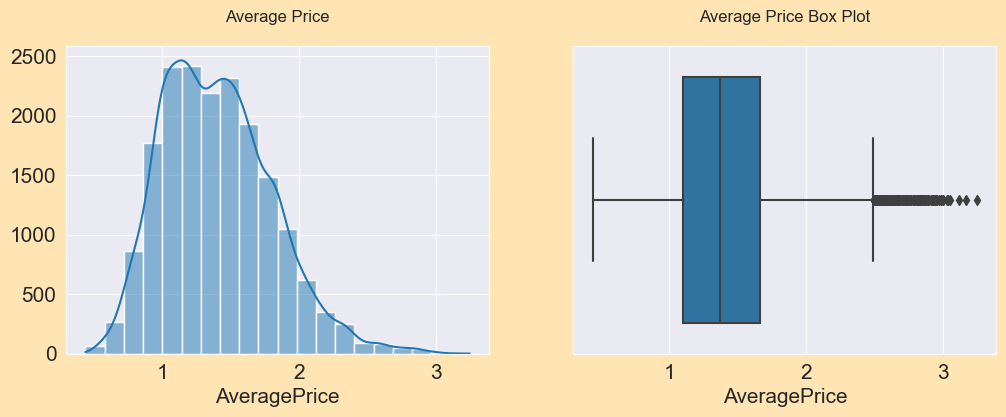

In [21]:
#Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['AveragePrice'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['AveragePrice'], ax=axes[1])

axes[0].set_title('Average Price', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Average Price Box Plot', size=12, y=1.05)

plt.show()

The data distribution looks moderately skewed to the right because of higher average prices, also the box plot indicates the presence of a lot of outliers which also indicate due to prices whicb are higher than normal.

# Total Volume

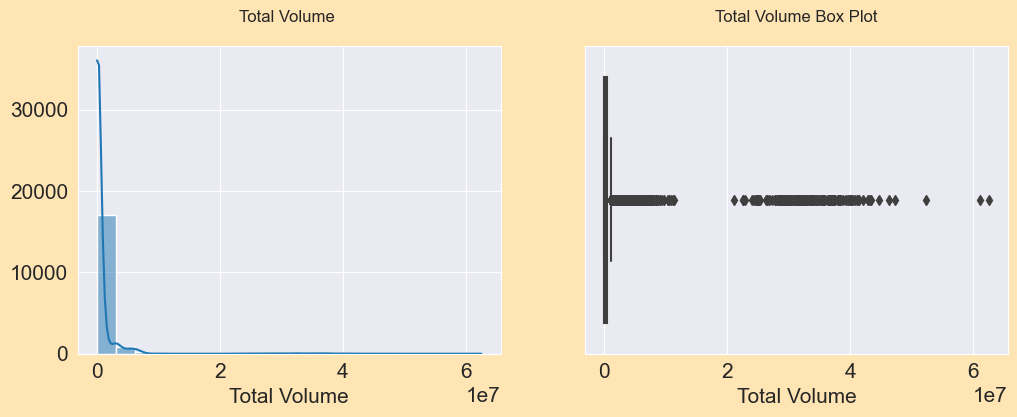

In [22]:
#Visualize feature distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Total Volume'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['Total Volume'], ax=axes[1])

axes[0].set_title('Total Volume ', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Total Volume Box Plot', size=12, y=1.05)

plt.show()

Distribution skewed to the right and a lot of outliers are present in the dataset

# 4046

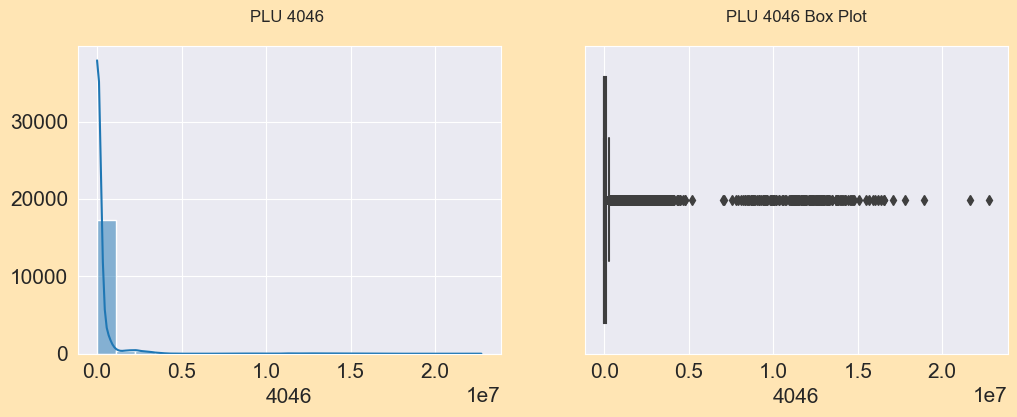

In [23]:
#Visualize feature distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['4046'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['4046'], ax=axes[1])

axes[0].set_title('PLU 4046 ', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('PLU 4046 Box Plot', size=12, y=1.05)

plt.show()

Distribution skewed to the right and a lot of outliers are present in the dataset

# 4225

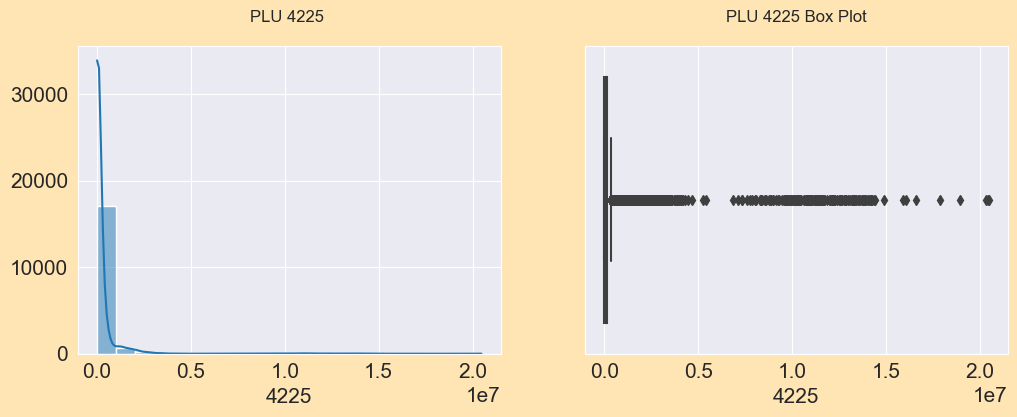

In [24]:
#Visualize feature distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['4225'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['4225'], ax=axes[1])

axes[0].set_title('PLU 4225 ', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('PLU 4225 Box Plot', size=12, y=1.05)

plt.show()

Distribution skewed to the right and a lot of outliers are present in the dataset

# 4770

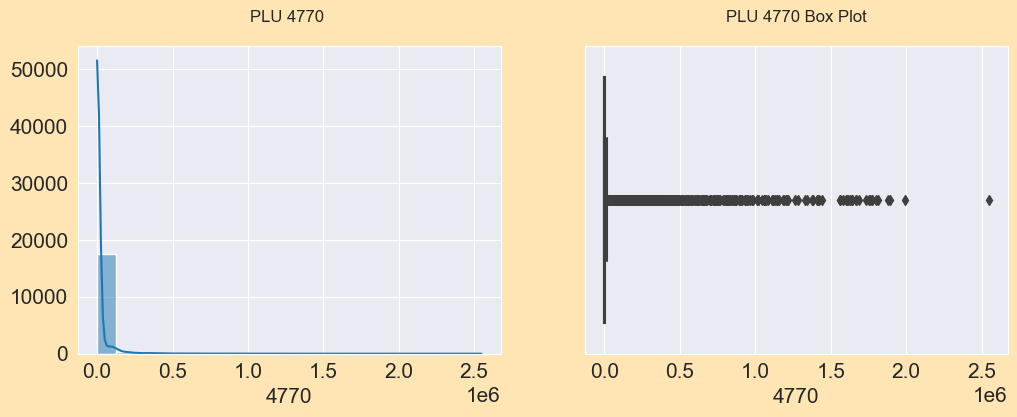

In [25]:
#Visualize feature distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['4770'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['4770'], ax=axes[1])

axes[0].set_title('PLU 4770 ', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('PLU 4770 Box Plot', size=12, y=1.05)

plt.show()

Distribution skewed to the right and a lot of outliers are present in the dataset

# Small Bags

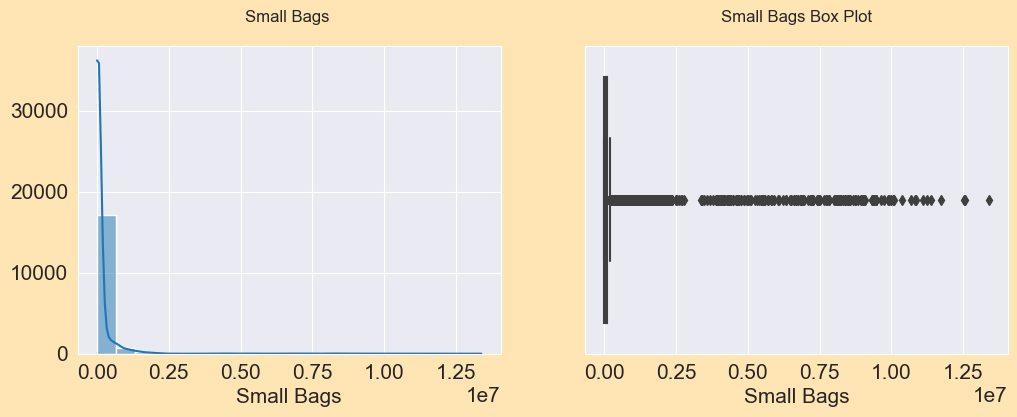

In [26]:
#Visualize feature distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Small Bags'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['Small Bags'], ax=axes[1])

axes[0].set_title('Small Bags ', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Small Bags Box Plot', size=12, y=1.05)

plt.show()

Distribution skewed to the right and a lot of outliers are present in the dataset

# Large Bags

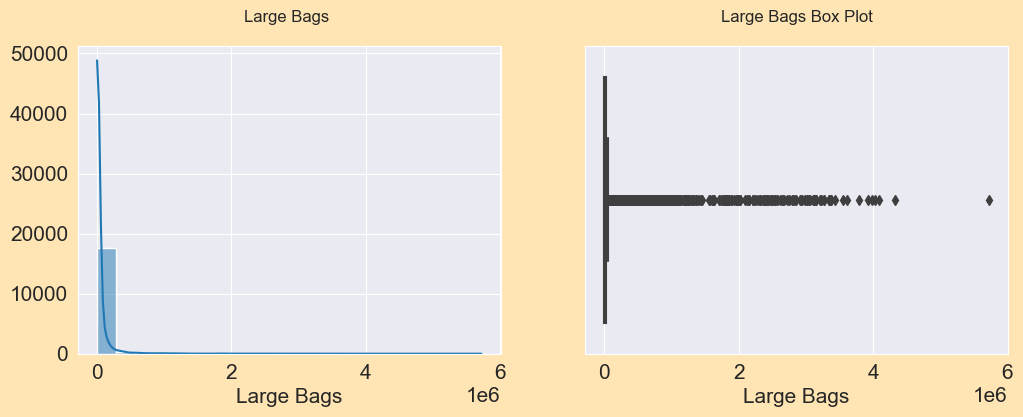

In [27]:
#Visualize feature distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Large Bags'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['Large Bags'], ax=axes[1])

axes[0].set_title('Large Bags ', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Large Bags Box Plot', size=12, y=1.05)

plt.show()

Distribution skewed to the right and a lot of outliers are present in the dataset

# XLarge Bags

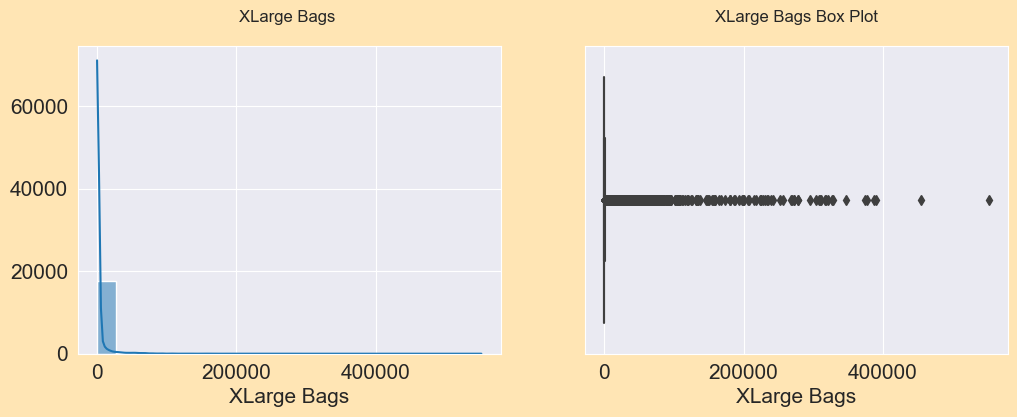

In [28]:
#Visualize feature distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['XLarge Bags'], kde=True , bins=20, ax=axes[0])
sns.boxplot(df['XLarge Bags'], ax=axes[1])

axes[0].set_title('XLarge Bags ', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('XLarge Bags Box Plot', size=12, y=1.05)

plt.show()

Distribution skewed to the right and a lot of outliers are present in the dataset

conventional    9126
organic         9123
Name: type, dtype: int64


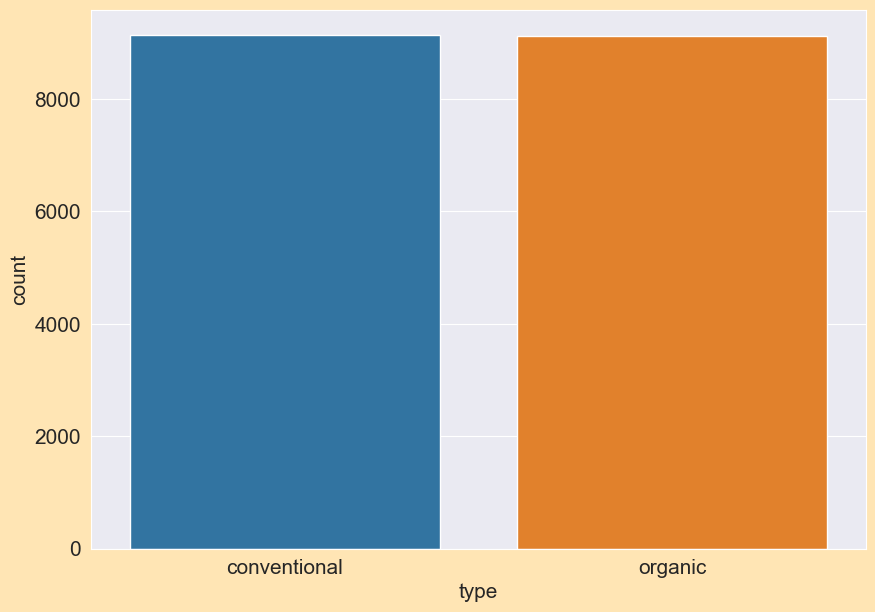

In [29]:
#Plotting Countplot
type_1 = sns.countplot(x = 'type',data = df)
print(df['type'].value_counts())

This column looks balanced

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


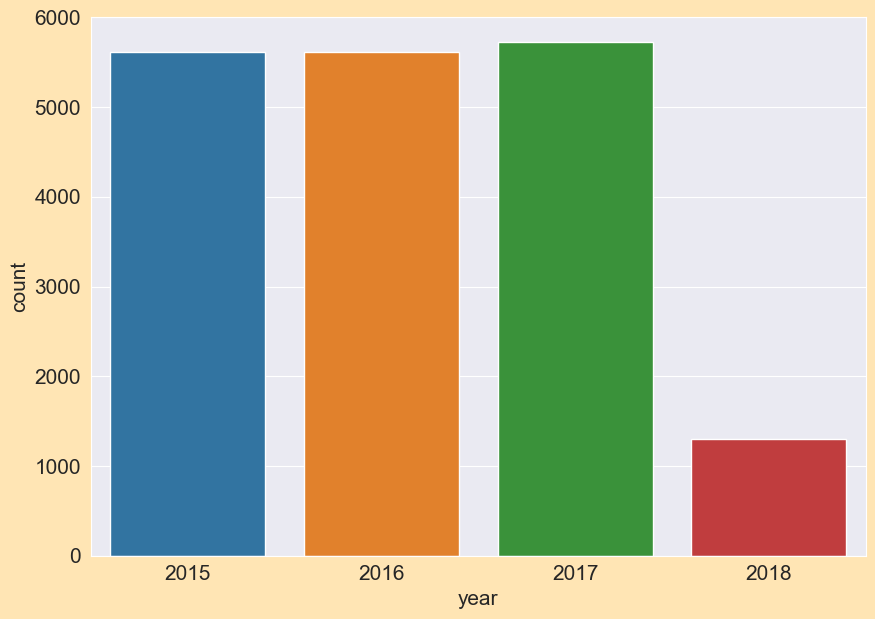

In [30]:
#Plotting Countplot
year_1 = sns.countplot(x = 'year',data = df)
print(df['year'].value_counts())

In [31]:
type_year = df.groupby(['year','type'])['type'].count().sort_values(ascending = False)
type_year

year  type        
2017  conventional    2862
      organic         2860
2015  conventional    2808
2016  conventional    2808
      organic         2808
2015  organic         2807
2018  conventional     648
      organic          648
Name: type, dtype: int64

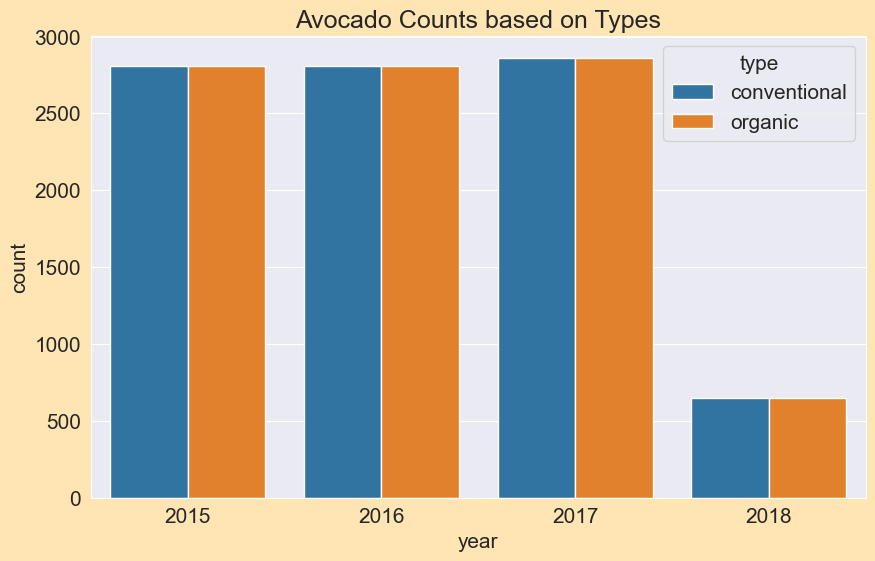

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='year', hue='type', data=df)
plt.title('Avocado Counts based on Types')
plt.show()

From 2015 - 2017 both the different types of avocados were bought in equal ration with the highest number of them being bought in 2017 whereas in 2018 the trend seems declined

# Trend in Average Price over Years

In [33]:
price_by_date = df.groupby('Date').mean()['AveragePrice']
price_by_date

Date
2015-01-04    1.301296
2015-01-11    1.370648
2015-01-18    1.391111
2015-01-25    1.397130
2015-02-01    1.247037
                ...   
2018-02-25    1.359630
2018-03-04    1.350185
2018-03-11    1.335093
2018-03-18    1.313704
2018-03-25    1.346852
Name: AveragePrice, Length: 169, dtype: float64

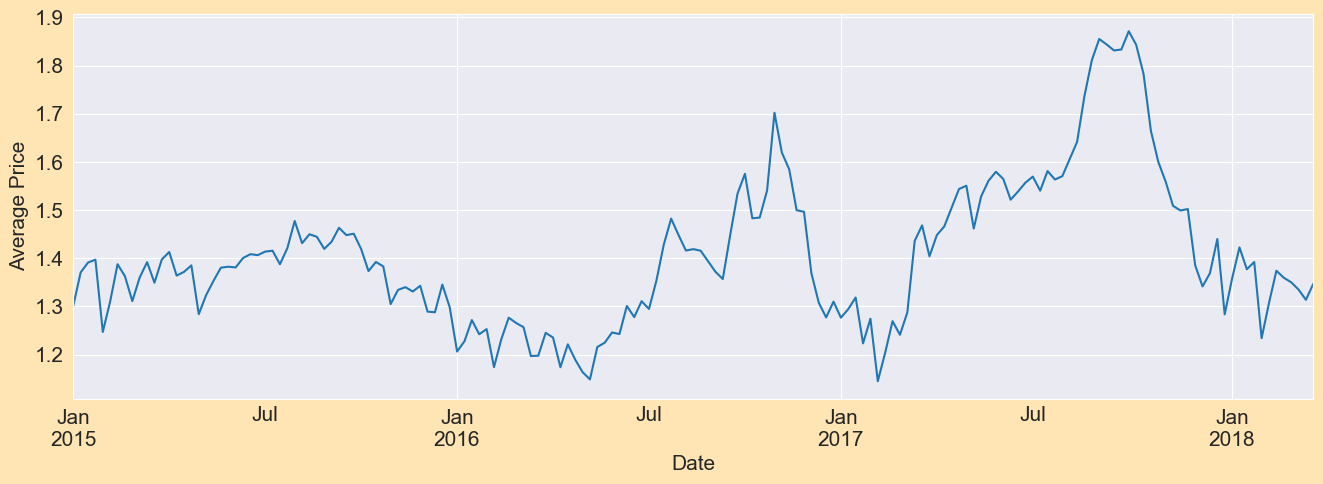

In [34]:
plt.figure(figsize=(16,5))

# Plot the average price over the time
price_by_date.plot()
plt.ylabel('Average Price');

The  plot shows the trend of the average price of avocados over time. You can see that the price fluctuates throughout the year, with some peaks and valleys. The price tends to be higher in the winter months and lower in the summer months. You can also see that the price has increased slightly from 2015 to 2018.

# Encoding Categorical Columns

In [35]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month'],
      dtype='object')

In [36]:
df.drop(columns = ['Date'],inplace = True)

In [37]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for col in ['type','region']:
    df[col] = lab_enc.fit_transform(df[col])
df

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,53,1


# Checking Correlation

In [38]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.063915,0.087891,0.081033,-0.000032,1.000000,-0.000055,-0.177050


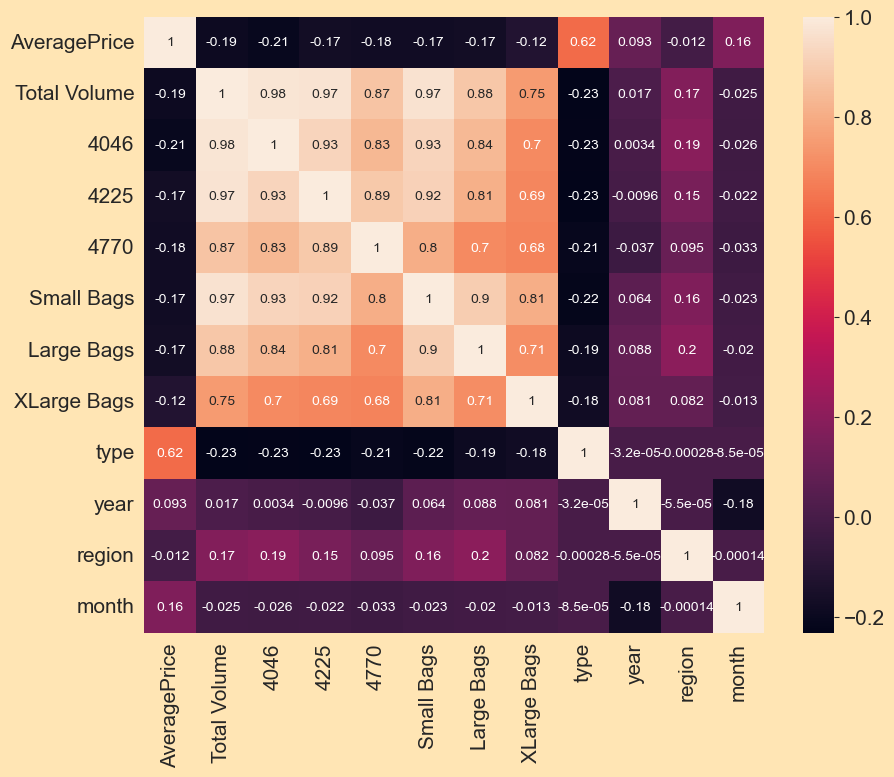

In [39]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot = True, annot_kws = {'size':10})
plt.show()

# Observations

Some observations from the correlation matrix are:

1. The average price of avocados has a strong positive correlation with the type of avocados, with a coefficient of 0.62. This means that organic avocados tend to have higher prices than conventional avocados.


2. The average price of avocados also has a weak positive correlation with the year of the observation, with a coefficient of 0.09. This means that the price of avocados has increased slightly over time.


3. The total volume of avocados sold in the US and all the PLU columns (4046, 4225, and 4770) have a strong negative correlation with the average price of avocados, with coefficients ranging from -0.17 to -0.21. This means that the price of avocados tends to decrease as the sales of avocados increase.


4. The total volume of avocados sold in the US and all the PLU columns (4046, 4225, and 4770) also have a strong negative correlation with the type of avocados, with coefficients ranging from -0.19 to -0.23. This means that conventional avocados tend to have higher sales than organic avocados.


5. The total volume of avocados sold in the US and all the PLU columns (4046, 4225, and 4770) have a very high positive correlation with each other, with coefficients ranging from 0.83 to 0.98. This means that the sales of different sizes of avocados are highly related to each other.


6.  The bag sizes (Small Bags, Large Bags, and XLarge Bags) also have a strong negative correlation with the average price and the type of avocados, with coefficients ranging from -0.12 to -0.22. This means that the price of avocados tends to decrease as the sales of bagged avocados increase, and that conventional avocados tend to have higher sales of bagged avocados than organic avocados.


7. The bag sizes (Small Bags, Large Bags, and XLarge Bags) also have a high positive correlation with each other and with the total volume and the PLU columns, with coefficients ranging from 0.68 to 1.00. This means that the sales of different types of packaging are highly related to each other and to the sales of different sizes of avocados.


8. The region of the observation has a weak positive correlation with the total volume and the PLU columns, with coefficients ranging from 0.08 to 0.19. This means that some regions tend to have higher sales of avocados than others.


9. The region of the observation has a very weak negative correlation with the average price and the type of avocados, with coefficients ranging from -0.01 to -0.00. This means that the price and the type of avocados are not significantly influenced by the region.

# Removing Outliers

In [40]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region', 'month'],
      dtype='object')

In [41]:
# Detect outliers with zscore method
from scipy.stats import zscore
columns = ['Total Volume', '4046', '4225', '4770', 'Small Bags','Large Bags', 'XLarge Bags']
z = np.abs(zscore(df[columns]))
z

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.229543,0.222529,0.17558


In [42]:
#threshold >3
np.where(z>3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 6, ..., 5, 5, 5], dtype=int64))

In [43]:
#making a new dataframe removing outliers
df1 = df[(z<3).all(axis =1)]
df1.shape

(17782, 12)

In [44]:
print('Old Data Frame shape', df.shape[0])
print('New Data Frame shape', df1.shape[0])

Old Data Frame shape 18249
New Data Frame shape 17782


In [45]:
print('Data Loss Percentage = ', ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage =  2.55904433119623


Data loss percentage is below 10% with z score method. Lets check by iqr method also

In [46]:
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Create a boolean mask for the outliers
df2 = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)]

In [47]:
df2.shape

(11747, 12)

In [48]:
print('Data Loss Percentage = ', ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage =  35.62934955340019


Data Loss is more than 10 %

In [49]:
df1

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,1.33,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,0,2015,0,12
1,1.35,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,0,2015,0,12
2,0.93,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,0,2015,0,12
3,1.08,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,0,2015,0,12
4,1.28,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,0,2015,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,1,2018,53,2
18245,1.71,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1,2018,53,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1,2018,53,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1,2018,53,1


In [50]:
df1.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

In [51]:
df1.duplicated().sum()

0

In [52]:
df1['type'].value_counts()

1    9123
0    8659
Name: type, dtype: int64

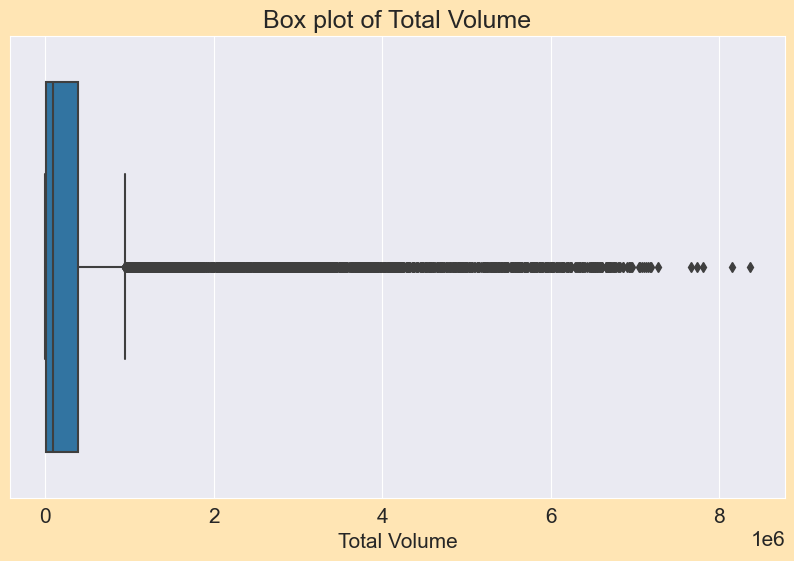

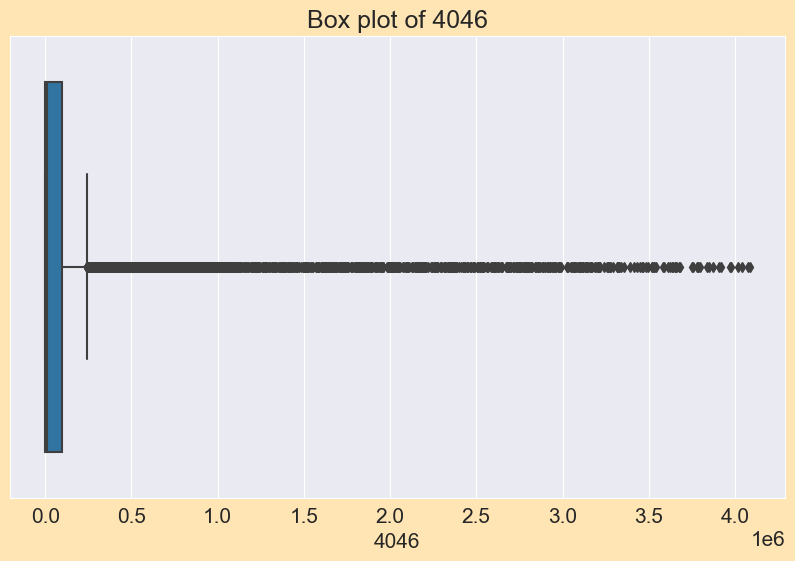

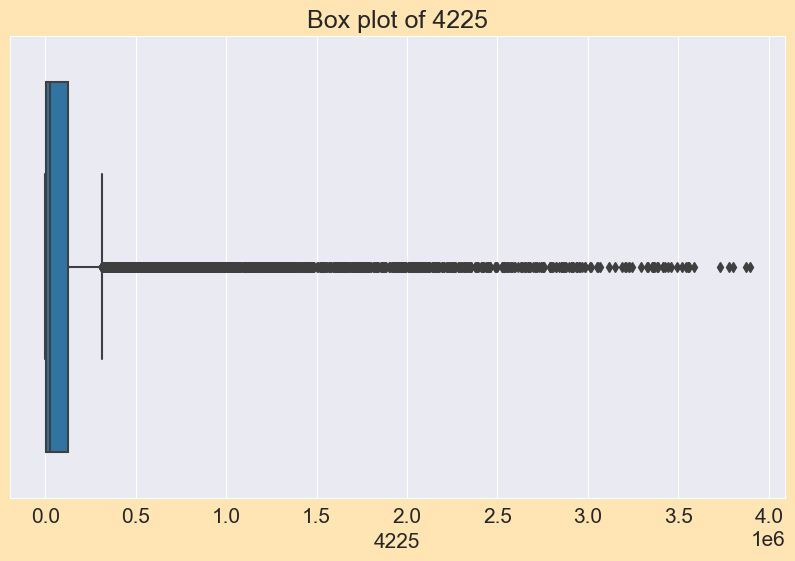

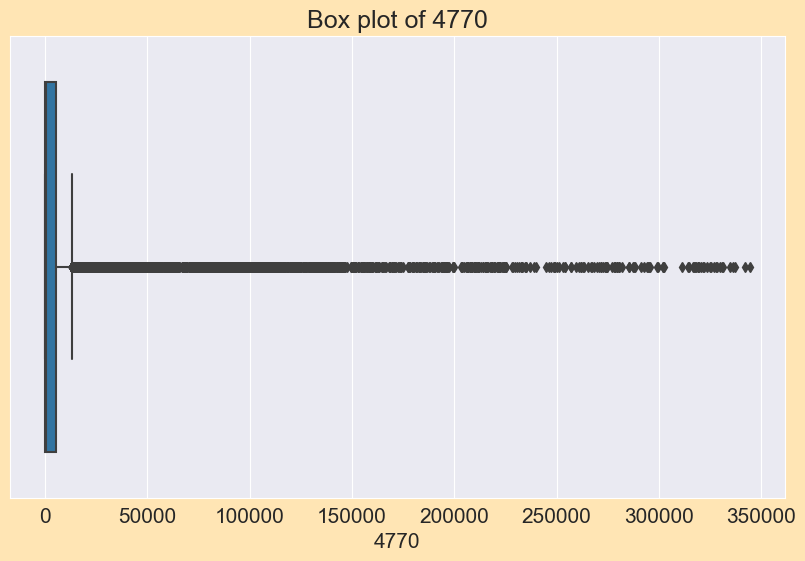

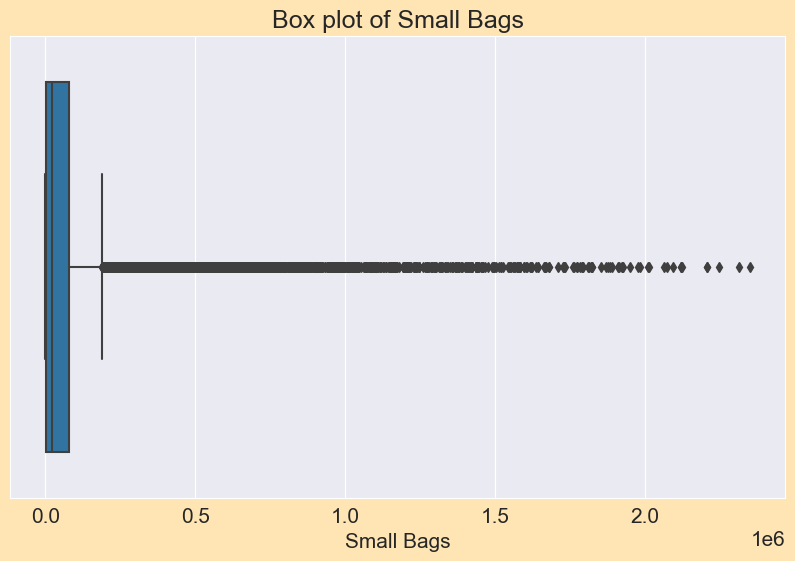

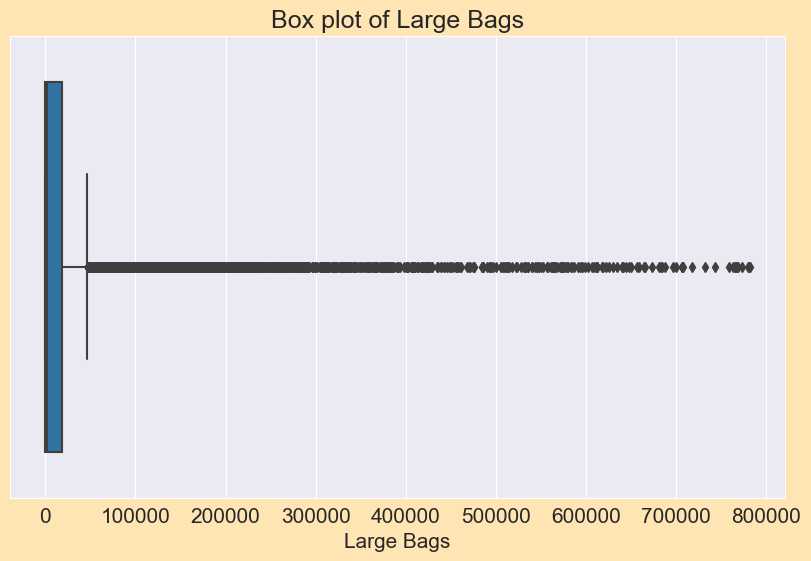

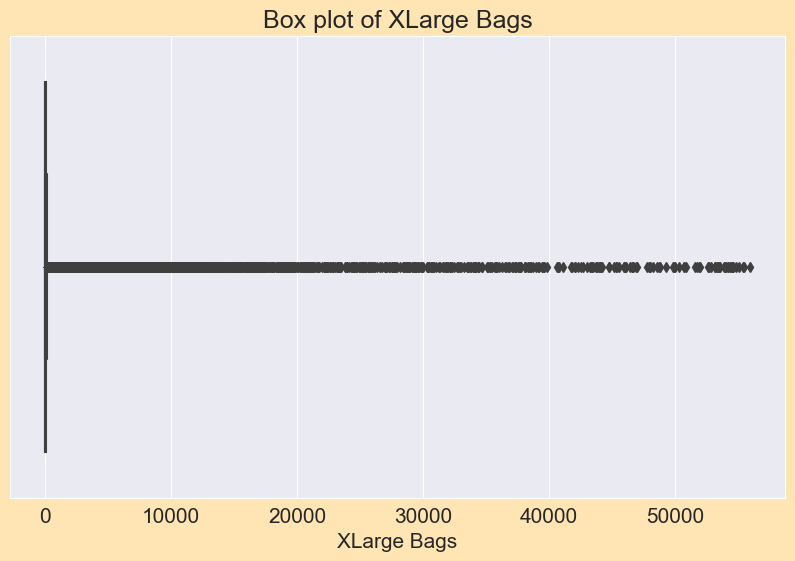

In [53]:
for column in df1[columns]:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df1[column])
    plt.title(f'Box plot of {column}')
    plt.show()

# Skewness Treatment

In [54]:
df1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
month           0.098217
dtype: float64

# Here’s a brief interpretation of the skewness values:

1. The average price of avocados has a moderate positive skewness of 0.56, meaning that most of the prices are clustered around the lower end, but there are some outliers with higher prices. The mean price is 1.41, while the median price is 1.37.


2. The total volume of avocados sold in the US and all the PLU columns (4046, 4225, and 4770) have a very high positive skewness, ranging from 3.78 to 4.93. This means that these columns are highly skewed to the right, with most of the values being very small, but a few values being extremely large. The mean values are much higher than the median values for these columns, indicating the presence of outliers.


3. The bag sizes (Small Bags, Large Bags, and XLarge Bags) also have a very high positive skewness, ranging from 4.24 to 6.16. These columns are also very skewed to the right, with most of the values being close to zero, but a few values being very large. The mean values are much higher than the median values for these columns, indicating the presence of outliers.


4. The type of avocados has a slight negative skewness of -0.05, meaning that the distribution has a longer left tail. This means that most of the observations are conventional avocados, while fewer observations are organic avocados. The mean type is 0.33, while the median type is 0.00.


5. The year of the observation has a weak positive skewness of 0.22, meaning that the distribution has a longer right tail. This means that most of the observations are from the later years (2017 and 2018), while fewer observations are from the earlier years (2015 and 2016). The mean year is 2016.15, while the median year is 2016.00.


6. The region of the observation has a very weak positive skewness of 0.01, meaning that the distribution is almost symmetrical. This means that the regions are evenly distributed in the dataset. The mean region is 26.50, while the median region is 26.50.


7. The month of the observation has a weak positive skewness of 0.10, meaning that the distribution has a longer right tail. This means that most of the observations are from the later months of the year, while fewer observations are from the earlier months of the year. The mean month is 6.18, while the median month is 6.00.



In [55]:
df1.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region', 'month'],
      dtype='object')

In [56]:
df1[[ 'Total Volume', '4046', '4225', '4770', 'Small Bags','Large Bags', 'XLarge Bags', 'type', 'year', 'month']] = np.cbrt(df1[['Total Volume', '4046', '4225', '4770', 'Small Bags','Large Bags', 'XLarge Bags', 'type', 'year', 'month']])
df1.skew()

AveragePrice    0.560969
Total Volume    1.248634
4046            1.564617
4225            1.286719
4770            1.645148
Small Bags      1.251353
Large Bags      1.282704
XLarge Bags     2.288933
type           -0.052210
year            0.220365
region          0.005773
month          -0.451107
dtype: float64

# Feature Scaling

In [57]:
#seperating features and target variables
Y = df1['AveragePrice']
X = df1.drop('AveragePrice', axis = 1)


Y1 = df1['region']
X1 = df1.drop('region', axis = 1)


In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
x

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,month
0,-0.354089,-0.705362,0.064883,-0.529798,-0.510944,-0.793364,-0.516326,-1.026443,-1.215024,-1.698613,1.334404
1,-0.407704,-0.750850,-0.020407,-0.511952,-0.483999,-0.789373,-0.516326,-1.026443,-1.215024,-1.698613,1.334404
2,-0.117703,-0.734240,0.411907,-0.423134,-0.530761,-0.784231,-0.516326,-1.026443,-1.215024,-1.698613,1.334404
3,-0.279279,-0.695237,0.194527,-0.490150,-0.626226,-0.759214,-0.516326,-1.026443,-1.215024,-1.698613,1.334404
4,-0.431455,-0.716127,-0.027893,-0.485656,-0.612407,-0.717298,-0.516326,-1.026443,-1.215024,-1.698613,1.172196
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.728403,-0.618694,-0.861122,-0.800418,-0.377777,-0.615154,-0.516326,0.974238,1.978758,1.742552,-1.217142
17778,-0.773259,-0.689178,-0.736088,-0.800418,-0.499480,-0.655506,-0.516326,0.974238,1.978758,1.742552,-1.861334
17779,-0.775096,-0.689156,-0.792146,-0.131310,-0.485833,-0.855252,-0.516326,0.974238,1.978758,1.742552,-1.861334
17780,-0.740047,-0.658395,-0.760349,-0.131595,-0.437264,-0.843497,-0.516326,0.974238,1.978758,1.742552,-1.861334


In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_1 = pd.DataFrame(scaler.fit_transform(X1),columns = X1.columns)
x_1

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,month
0,-0.212660,-0.354089,-0.705362,0.064883,-0.529798,-0.510944,-0.793364,-0.516326,-1.026443,-1.215024,1.334404
1,-0.162942,-0.407704,-0.750850,-0.020407,-0.511952,-0.483999,-0.789373,-0.516326,-1.026443,-1.215024,1.334404
2,-1.207026,-0.117703,-0.734240,0.411907,-0.423134,-0.530761,-0.784231,-0.516326,-1.026443,-1.215024,1.334404
3,-0.834139,-0.279279,-0.695237,0.194527,-0.490150,-0.626226,-0.759214,-0.516326,-1.026443,-1.215024,1.334404
4,-0.336956,-0.431455,-0.716127,-0.027893,-0.485656,-0.612407,-0.717298,-0.516326,-1.026443,-1.215024,1.172196
...,...,...,...,...,...,...,...,...,...,...,...
17777,0.533114,-0.728403,-0.618694,-0.861122,-0.800418,-0.377777,-0.615154,-0.516326,0.974238,1.978758,-1.217142
17778,0.731987,-0.773259,-0.689178,-0.736088,-0.800418,-0.499480,-0.655506,-0.516326,0.974238,1.978758,-1.861334
17779,1.129733,-0.775096,-0.689156,-0.792146,-0.131310,-0.485833,-0.855252,-0.516326,0.974238,1.978758,-1.861334
17780,1.278888,-0.740047,-0.658395,-0.760349,-0.131595,-0.437264,-0.843497,-0.516326,0.974238,1.978758,-1.861334


# VIF

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,171.101394,Total Volume
1,21.560629,4046
2,36.374330,4225
3,3.319138,4770
4,17.198429,Small Bags
5,3.223356,Large Bags
6,1.954726,XLarge Bags
7,2.193881,type
8,1.387386,year
9,1.110925,region


In [61]:
x.drop(columns = ['Total Volume'],inplace = True)

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF Values,Features
0,4.172514,4046
1,5.500070,4225
2,3.294978,4770
3,6.590721,Small Bags
4,2.121921,Large Bags
5,1.952832,XLarge Bags
6,2.177973,type
7,1.387336,year
8,1.088648,region
9,1.064347,month


In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_1.values,i) for i in range(len(x_1.columns))]
vif['Features'] = x_1.columns
vif

,VIF Values,Features
0,2.078511,AveragePrice
1,177.072404,Total Volume
2,21.168196,4046
3,39.130278,4225
4,3.293780,4770
5,17.207022,Small Bags
6,3.191237,Large Bags
7,1.948993,XLarge Bags
8,2.722642,type
9,1.461773,year


In [64]:
x_1.drop(columns = ['Total Volume'],inplace = True)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Values'] = [variance_inflation_factor(x_1.values,i) for i in range(len(x_1.columns))]
vif['Features'] = x_1.columns
vif

,VIF Values,Features
0,1.968149,AveragePrice
1,4.059729,4046
2,5.739834,4225
3,3.266488,4770
4,6.635353,Small Bags
5,2.235491,Large Bags
6,1.948988,XLarge Bags
7,2.721700,type
8,1.458290,year
9,1.143704,month


In [66]:
Y1.value_counts()

0     338
24    338
1     338
28    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
40    338
41    338
42    338
43    338
44    338
47    338
48    338
49    338
50    338
26    338
27    338
11    338
5     338
7     338
8     338
9     338
10    338
23    338
12    338
13    338
14    338
3     338
16    338
17    338
18    338
19    338
20    338
2     338
21    338
4     338
53    335
25    333
22    331
29    325
46    307
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

# Modelling for Predicting Region

In [67]:
#finding random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRs = 0
for i in range(1,500):
    x_train,x_test,y_train,y_test = train_test_split(x_1,Y1,test_size = 0.30,random_state = i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i 
print('Best Accuracy is =', maxAccu,'at random state =', maxRS )

Best Accuracy is = 0.9231490159325211 at random state = 149


In [69]:
#Creating train and test split at random state = 149
x_train,x_test,y_train,y_test = train_test_split(x_1,Y1,test_size = 0.30,random_state = maxRS)

In [70]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [71]:
#random Forest classifier
RFR = RandomForestClassifier()
RFR.fit(x_train,y_train)
predRFC = RFR.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

accuracy score is =  0.9180880974695408
[[103   0   0 ...   0   0   0]
 [  0  97   0 ...   0   0   0]
 [  0   0 108 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   0  75   0]
 [  0   2   1 ...   0   0  68]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       110
           1       0.89      0.93      0.91       104
           2       0.98      1.00      0.99       108
           3       0.91      0.88      0.90        95
           4       0.96      0.98      0.97       108
           5       0.94      0.84      0.89        96
           6       1.00      1.00      1.00        93
           7       0.91      0.94      0.92        97
           8       0.98      1.00      0.99        95
           9       0.95      0.90      0.92        99
          10       0.80      0.91      0.85        92
          11       0.90      0.99      0.94        90
          12       0.96      0.95      0.96       103
          1

In [72]:
#Logistic Regression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

accuracy score is =  0.492970946579194
[[47  0  0 ...  0  0  0]
 [ 0 27  0 ...  0  0  1]
 [ 0  0 70 ...  0  0 10]
 ...
 [ 0  0  0 ... 46  0  0]
 [ 0  0  0 ...  0 67  0]
 [ 0  6  0 ...  0  0 22]]
              precision    recall  f1-score   support

           0       0.36      0.43      0.39       110
           1       0.23      0.26      0.24       104
           2       0.59      0.65      0.62       108
           3       0.48      0.42      0.45        95
           4       0.51      0.46      0.49       108
           5       0.38      0.55      0.45        96
           6       0.76      0.88      0.82        93
           7       0.52      0.77      0.62        97
           8       0.75      0.82      0.78        95
           9       0.42      0.69      0.53        99
          10       0.57      0.39      0.46        92
          11       0.37      0.48      0.42        90
          12       0.52      0.50      0.51       103
          13       0.43      0.43      0.43     

In [73]:
#XGboost

xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)
predXGB = xgb.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predXGB))
print(confusion_matrix(y_test,predXGB))
print(classification_report(y_test,predXGB))

accuracy score is =  0.8804123711340206
[[100   0   0 ...   0   0   0]
 [  0  87   0 ...   0   0   0]
 [  0   0 100 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  1   0   0 ...   0  72   0]
 [  0   1   1 ...   0   0  72]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       110
           1       0.83      0.84      0.83       104
           2       0.96      0.93      0.94       108
           3       0.84      0.80      0.82        95
           4       0.92      0.92      0.92       108
           5       0.87      0.81      0.84        96
           6       0.98      0.97      0.97        93
           7       0.90      0.89      0.89        97
           8       0.99      0.99      0.99        95
           9       0.89      0.87      0.88        99
          10       0.73      0.89      0.80        92
          11       0.90      0.92      0.91        90
          12       0.97      0.85      0.91       103
          1

In [74]:
#SVM classifier

svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

accuracy score is =  0.7165885660731022
[[96  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  0]
 [ 0  0 90 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  1 74  0]
 [ 0  1  0 ...  0  0 57]]
              precision    recall  f1-score   support

           0       0.51      0.87      0.64       110
           1       0.55      0.55      0.55       104
           2       0.96      0.83      0.89       108
           3       0.87      0.49      0.63        95
           4       0.94      0.70      0.80       108
           5       0.62      0.55      0.59        96
           6       0.94      0.97      0.95        93
           7       0.73      0.85      0.78        97
           8       0.95      0.98      0.96        95
           9       0.59      0.64      0.61        99
          10       0.41      0.70      0.51        92
          11       0.62      0.80      0.70        90
          12       0.90      0.72      0.80       103
          13       0.60      0.52      0.56    

In [75]:
#Gradient Boosting Classifier

gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

accuracy score is =  0.8279287722586691
[[ 97   0   0 ...   0   0   0]
 [  0  77   0 ...   0   0   1]
 [  0   0 100 ...   0   0   2]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   0  67   0]
 [  0   1   2 ...   0   0  67]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       110
           1       0.78      0.74      0.76       104
           2       0.94      0.93      0.93       108
           3       0.73      0.69      0.71        95
           4       0.84      0.89      0.86       108
           5       0.75      0.81      0.78        96
           6       0.98      0.91      0.94        93
           7       0.82      0.84      0.83        97
           8       0.99      0.94      0.96        95
           9       0.86      0.80      0.83        99
          10       0.66      0.80      0.73        92
          11       0.80      0.88      0.84        90
          12       0.95      0.85      0.90       103
          1

In [76]:
#AdaBoost Classifier


abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
predabc = abc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predabc))
print(confusion_matrix(y_test,predabc))
print(classification_report(y_test,predabc))

accuracy score is =  0.04629803186504217
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.00      0.00      0.00       104
           2       0.00      0.00      0.00       108
           3       0.00      0.00      0.00        95
           4       0.00      0.00      0.00       108
           5       0.00      0.00      0.00        96
           6       0.00      0.00      0.00        93
           7       0.03      0.99      0.06        97
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        99
          10       0.00      0.00      0.00        92
          11       0.00      0.00      0.00        90
          12       0.00      0.00      0.00       103
          13       0.38      0.11      0.17       102
          14       0.00     

In [77]:
#Bagging Classifier


bc = BaggingClassifier()
bc.fit(x_train,y_train)
predbc = bc.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predabc))

accuracy score is =  0.862792877225867
[[ 94   0   0 ...   0   0   0]
 [  0  89   0 ...   0   0   2]
 [  0   0 105 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   0  70   0]
 [  0   4   1 ...   0   0  64]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       110
           1       0.00      0.00      0.00       104
           2       0.00      0.00      0.00       108
           3       0.00      0.00      0.00        95
           4       0.00      0.00      0.00       108
           5       0.00      0.00      0.00        96
           6       0.00      0.00      0.00        93
           7       0.03      0.99      0.06        97
           8       0.00      0.00      0.00        95
           9       0.00      0.00      0.00        99
          10       0.00      0.00      0.00        92
          11       0.00      0.00      0.00        90
          12       0.00      0.00      0.00       103
          13

In [78]:
#ExtraTrees Classifier


et = ExtraTreesClassifier()
et.fit(x_train,y_train)
predet = et.predict(x_test)
print('accuracy score is = ',accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

accuracy score is =  0.9381443298969072
[[105   0   0 ...   0   0   0]
 [  0 100   0 ...   0   0   0]
 [  0   0 108 ...   0   0   0]
 ...
 [  0   0   0 ...  50   0   0]
 [  0   0   0 ...   1  75   0]
 [  0   1   2 ...   0   0  81]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       110
           1       0.89      0.96      0.93       104
           2       0.96      1.00      0.98       108
           3       0.92      0.92      0.92        95
           4       0.99      1.00      1.00       108
           5       0.95      0.86      0.91        96
           6       1.00      1.00      1.00        93
           7       0.96      0.97      0.96        97
           8       0.98      1.00      0.99        95
           9       0.96      0.89      0.92        99
          10       0.86      0.90      0.88        92
          11       0.95      1.00      0.97        90
          12       0.98      0.95      0.97       103
          1

# Cross Validation

In [79]:
#random forest
score = cross_val_score(RFR,x_1,Y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predRFC)- score.mean())

[0.67613157 0.81388811 0.76687289 0.69206974 0.49718785]
0.689230032638948
Difference between Accuracy score and  cross validation score is = 0.2288580648305928


In [80]:
#logistic regression
score = cross_val_score(LR,x_1,Y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predLR)- score.mean())

[0.49142536 0.46724768 0.44263217 0.27615298 0.2215973 ]
0.37981109825427006
Difference between Accuracy score and  cross validation score is = 0.11315984832492393


In [81]:
#XGboost
score = cross_val_score(xgb,x_1,Y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predXGB)- score.mean())

[0.57998313 0.76440821 0.73650169 0.65129359 0.44263217]
0.6349637575173781
Difference between Accuracy score and  cross validation score is = 0.2454486136166425


In [82]:
#Gradient Boosting Classifier
score = cross_val_score(gb,x_1,Y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predgb)- score.mean())

[0.4776497  0.75456846 0.70781777 0.63245219 0.39820022]
0.5941376705196079
Difference between Accuracy score and  cross validation score is = 0.23379110173906126


In [83]:
#SVM
score = cross_val_score(svc,x_1,Y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predsvc)- score.mean())

[0.63143098 0.70593197 0.58183352 0.43138358 0.34251969]
0.5386199458410403
Difference between Accuracy score and  cross validation score is = 0.17796862023206184


In [84]:
#Ada Boosting
score = cross_val_score(abc,x_1,Y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predabc)- score.mean())

[0.03907787 0.0652235  0.06805399 0.0548369  0.07424072]
0.0602865972228591
Difference between Accuracy score and  cross validation score is = -0.013988565357816923


In [85]:
#Bagging
score = cross_val_score(bc,x_1,Y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predbc)- score.mean())

[0.55046387 0.74304189 0.69713161 0.61839145 0.44038245]
0.6098822550189379
Difference between Accuracy score and  cross validation score is = 0.25291062220692906


In [86]:
#Extra Trees
score = cross_val_score(et,x_1,Y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and  cross validation score is =' ,accuracy_score(y_test,predet)- score.mean())

[0.71633399 0.79983132 0.78458943 0.72047244 0.51631046]
0.7075075272605262
Difference between Accuracy score and  cross validation score is = 0.23063680263638098


After applying cross-validation technique we observe the better cross-validation score is for ExtraTreesClassifier and the difference with accuracy score is 0.23063680263638098 confirming as follows:
    
**ExtraTreesClassifier is our best Model**

# HyperParameter Tuning

In [87]:
model = ExtraTreesClassifier()
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [89]:
# ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap':[True, False],
             'criterion':['gini', 'entropy'],
             'random_state': [maxRS , 10, 50, 1000],
             'max_depth':[0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

# Build the model 
model = ExtraTreesClassifier()

In [90]:
%%time 

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

Wall time: 58min 56s


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [149, 10, 50, 1000]})

In [91]:
final_model = grid_search.best_estimator_
final_model.fit(x_train,y_train)
pred = final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

93.72071227741331


**The accuracy for final model is 93.72%**

# Plotting ROC and compare AUC for the final model

In [93]:
#multiclass classification
from sklearn.multiclass import OneVsRestClassifier
# Create the classifier
classifier = OneVsRestClassifier(final_model)

# Train the model
classifier.fit(x_train, y_train)

# Get the decision function scores for each class
y_score = classifier.predict_proba(x_test)

In [101]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(y_test)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 6))
# one color for each category
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
          '#bcbd22', '#17becf', '#1a9850', '#66c2a5', '#a6d854', '#6a3d9a', '#b15928', '#f0027f', 
          '#7f3b08', '#386cb0', '#8dd3c7', '#d9d9d9', '#e31a1c', '#fb9a99', '#fdae61', '#ffffbf', 
          '#2ca02c', '#e377c2', '#17becf', '#9467bd', '#d62728', '#bcbd22', '#7f7f7f', '#1f77b4', 
          '#ff7f0e', '#2ca02c', '#1a9850', '#d62728', '#a6d854', '#8dd3c7', '#e377c2', '#7f7f7f', 
          '#bcbd22', '#17becf', '#1a9850', '#66c2a5', '#a6d854', '#e377c2', '#7f7f7f']

# Plot a roc curve for each category
for i, color in zip(range(len(y_test)), colors):
    print()
    plt.plot(fpr[i], tpr[i], color=color, lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Best Model')
plt.show()

NameError: name 'auc' is not defined

In [98]:
category_mappings

NameError: name 'category_mappings' is not defined

In [99]:
y_test

4644     35
13466    29
16682    36
17306    48
14214    43
         ..
16367    30
2056     39
5451     50
7872     42
15513    14
Name: region, Length: 5335, dtype: int32

In [100]:
y_score

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.63218566e-05, ...,
        3.17684350e-03, 4.77270488e-03, 1.25172393e-03],
       [0.00000000e+00, 1.16891576e-03, 9.23726796e-04, ...,
        0.00000000e+00, 0.00000000e+00, 8.18550449e-03],
       ...,
       [0.00000000e+00, 2.03323203e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.66027155e-03],
       [0.00000000e+00, 0.00000000e+00, 1.28061057e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01571692e-04, 4.60345336e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.62380965e-04]])

In [103]:
y_test = y_test.to_numpy()
y_score = y_score.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [108]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test is your test labels and y_score is the score output from the classifier
n_classes = len(np.unique(y_test))

# Convert class labels to binary matrix
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[i], y_score[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic to Multi-Class')
plt.legend(loc="lower right")
plt.show()

TypeError: Singleton array 35 cannot be considered a valid collection.

In [107]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_score:", y_score.shape)
print("y_test[:, i]:", y_test[:, i])
print("y_score[:, i]:", y_score[:, i])

Shape of y_test: (5335,)
Shape of y_score: (5335, 54)


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [109]:
print("Shape of y_test_bin:", y_test_bin.shape)
print("Shape of y_score:", y_score.shape)
print("y_test_bin[i]:", y_test_bin[i])
print("y_score[i]:", y_score[i])

Shape of y_test_bin: (5335, 54)
Shape of y_score: (5335, 54)
y_test_bin[i]: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_score[i]: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.47201472e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.42000920e-03
 0.00000000e+00 0.00000000e+00 7.60002044e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.83313480e-02 0.00000000e+00
 0.00000000e+00 4.35883525e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.90000511e-04 0.00000000e+00 9.55037159e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.09625564e-03 7.43480260e-05
 0.00000000e+00 0.00000000e+00 3.42000920e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000

# Creating Regression Model

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [112]:
#Finding best random state

maxAccu = 0
maxRs = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.30,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i 
print('Best r2 score is =', maxAccu,'at random state =', maxRS )

Best r2 score is = 0.5185904506034029 at random state = 140


In [113]:
#Creating train and test split at random state = 58
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.30,random_state = maxRS)

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
import xgboost as xgb

In [115]:
#linear Regression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred_LR =lr.predict(x_test)
pred_train = lr.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 51.85904506034029
R2 score on training data : 48.46222422764106
Mean Absolute Error : 0.21706274682180343
Mean Sqaured Error : 0.07882394117818343
Root Mean Squared Error : 0.28075601717182025


In [116]:
#XG boost
xgb = xgb.XGBRegressor()
xgb.fit(x_train,y_train)
pred_LR =xgb.predict(x_test)
pred_train = xgb.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 89.65672503771547
R2 score on training data : 96.14800807498729
Mean Absolute Error : 0.0947931222627402
Mean Sqaured Error : 0.016935636159249305
Root Mean Squared Error : 0.13013698997306378


In [117]:
#random Forest Regressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_LR =rf.predict(x_test)
pred_train = rf.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))

R2 score : 88.21644811661858
R2 score on training data : 98.37036641799148
Mean Absolute Error : 0.09528313027179004
Mean Sqaured Error : 0.01929388400562324


In [118]:
#KNN
kn = KNN()
kn.fit(x_train,y_train)
pred_LR =kn.predict(x_test)
pred_train = kn.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 85.23862729752439
R2 score on training data : 91.06876311981416
Mean Absolute Error : 0.10789653233364573
Mean Sqaured Error : 0.024169640487347703
Root Mean Squared Error : 0.15546588206853523


In [119]:
#Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
pred_LR =gb.predict(x_test)
pred_train = gb.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 74.6374325025961
R2 score on training data : 75.21876252238782
Mean Absolute Error : 0.1548204247327579
Mean Sqaured Error : 0.04152758355227599
Root Mean Squared Error : 0.20378317779511632


In [120]:
#lasso
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_LR =lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : -2.3866530995952928e-05
R2 score on training data : 0.0
Mean Absolute Error : 0.3286525139129741
Mean Sqaured Error : 0.16373576321766453
Root Mean Squared Error : 0.40464275999659816


In [121]:
#Ridge
rd = Ridge()
rd.fit(x_train,y_train)
pred_LR =rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 51.85869729878539
R2 score on training data : 48.462222620758524
Mean Absolute Error : 0.21706179655016328
Mean Sqaured Error : 0.07882451058808365
Root Mean Squared Error : 0.2807570312353435


In [122]:
#Decision Tree
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_LR =dt.predict(x_test)
pred_train = dt.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 74.3643174971025
R2 score on training data : 100.0
Mean Absolute Error : 0.13131396438612933
Mean Sqaured Error : 0.04197477038425492
Root Mean Squared Error : 0.20487745211285432


In [123]:
#SVR
from sklearn.svm import SVR
sv = SVR()
sv.fit(x_train,y_train)
pred_LR =sv.predict(x_test)
pred_train = sv.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 75.48023344948174
R2 score on training data : 76.7234632332175
Mean Absolute Error : 0.14392490499021293
Mean Sqaured Error : 0.04014761731883715
Root Mean Squared Error : 0.20036870344152338


In [124]:
#Extra Trees
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
pred_LR =et.predict(x_test)
pred_train = et.predict(x_train)
print('R2 score :', r2_score(y_test,pred_LR)*100)
print('R2 score on training data :', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :', mean_absolute_error(y_test,pred_LR))
print('Mean Sqaured Error :', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2 score : 91.19226730002393
R2 score on training data : 100.0
Mean Absolute Error : 0.081845679475164
Mean Sqaured Error : 0.014421404916588563
Root Mean Squared Error : 0.12008915403394498


# Cross Validation

In [125]:
from sklearn.model_selection import cross_val_score

In [127]:
score = cross_val_score(lr,x,Y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[-0.41132849  0.2655492   0.34709713  0.09248809  0.14286123]
0.08733343162652434
Difference between  R2 score and  cross validation score is = 82.4589241373715


In [129]:
score = cross_val_score(xgb,x,Y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[0.13437571 0.68190011 0.68965027 0.35949084 0.23404235]
0.4198918570867636
Difference between  R2 score and  cross validation score is = 49.20308159134756


In [130]:
score = cross_val_score(rf,x,Y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[-0.26144085  0.48568911  0.57051526  0.16778444 -0.00110423]
0.19228874393398773
Difference between  R2 score and  cross validation score is = 71.96339290662515


In [131]:
score = cross_val_score(kn,x,Y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[-0.83726147  0.14863008  0.37818732 -0.17526771 -0.06905023]
-0.1109524038845848
Difference between  R2 score and  cross validation score is = 102.2875076884824


In [132]:
score = cross_val_score(gb,x,Y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[0.13817464 0.57078635 0.6534481  0.35785161 0.2165466 ]
0.38736145871474953
Difference between  R2 score and  cross validation score is = 52.45612142854896


In [133]:
score = cross_val_score(lasso,x,Y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[-4.0523001  -0.7293968  -0.05123348 -0.3845869  -0.78463738]
-1.2004309324076277
Difference between  R2 score and  cross validation score is = 211.23536054078667


In [134]:
score = cross_val_score(rd,x,Y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[-0.41106322  0.26557207  0.34714243  0.09249283  0.14284744]
0.08739830966105658
Difference between  R2 score and  cross validation score is = 82.45243633391827


In [135]:
score = cross_val_score(dt,x,Y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[-1.34238246 -0.1133691   0.13953037 -0.51706695 -0.29525111]
-0.425707851288028
Difference between  R2 score and  cross validation score is = 133.76305242882674


In [136]:
score = cross_val_score(sv,x,Y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[-0.54022152  0.45411257 -0.13220938  0.29854614 -0.13541041]
-0.011036520237678048
Difference between  R2 score and  cross validation score is = 92.29591932379174


In [137]:
score = cross_val_score(et,x,Y,cv = 5, scoring = 'r2')
print(score)
print(score.mean())
print('Difference between  R2 score and  cross validation score is =', (r2_score(y_test,pred_LR)-score.mean())*100)

[-0.08346874  0.49865998  0.63383094  0.22535246  0.09396978]
0.27366888525501243
Difference between  R2 score and  cross validation score is = 63.825378774522676


In [ ]:
#from all the scores we are going to select ridge regression as our final model